In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import (load_iris, load_digits)
from sklearn.decomposition import PCA

from pca import (pca, highdim_pca)
from viz import (plot_iris_ds, plot_digits_ds)

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### PCA Gaussian

In [8]:
xC = np.array([2, 1])  # Center of data
sig = np.array([2, 0.5])  # Principal axes

theta = np.pi / 3  # Rotate cloud by pi/3

# Rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

nPoints = 10000
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + np.diag(xC) @ np.ones((2, nPoints))

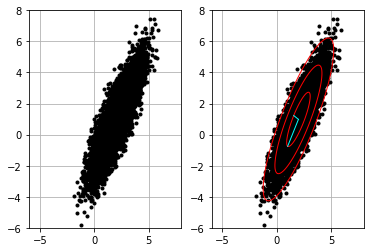

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0, :], X[1, :], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

Xavg = np.mean(X, axis=1)  # Compute mean
B = X - np.tile(Xavg, (nPoints, 1)).T  # Mean-subtracted data

# Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints), full_matrices=False)

ax2 = fig.add_subplot(122)
ax2.plot(X[0, :], X[1, :], '.', color='k')  # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))


theta = 2 * np.pi * np.arange(0, 1, 0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0, :], Xavg[1] + Xstd[1, :], '-', color='r', linewidth=1)
ax2.plot(Xavg[0] + 2 * Xstd[0, :], Xavg[1] + 2 * Xstd[1, :], '-', color='r', linewidth=1)
ax2.plot(Xavg[0] + 3 * Xstd[0, :], Xavg[1] + 3 * Xstd[1, :], '-', color='r', linewidth=1)

ax2.plot(np.array([Xavg[0], Xavg[0] + U[0, 0] * S[0]]),
         np.array([Xavg[1], Xavg[1] + U[1, 0] * S[0]]), '-', color='cyan', linewidth=1)
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0, 1] * S[1]]),
         np.array([Xavg[1], Xavg[1] + U[1, 1] * S[1]]), '-', color='cyan', linewidth=1)

plt.show()

### PCA: Ovarian Cancer


In [2]:
data = load_iris()
X = data.data
y = data.target

projected_iris = pca(X, 2)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [3]:
sklearn_pca = PCA(n_components=2)
sklearn_projected_iris = sklearn_pca.fit_transform(X)

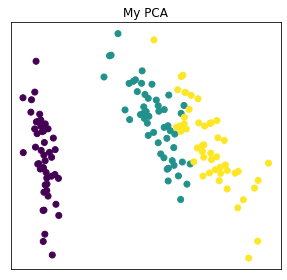

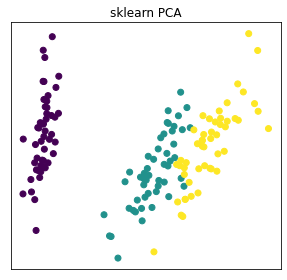

In [4]:
plot_iris_ds(projected_iris, y, sklearn_projected_iris)

In [5]:
digits = load_digits()

In [6]:
digits.data.shape

(1797, 64)

In [7]:
projected_digits = highdim_pca(digits.data, 2)

In [8]:
sklearn_pca = PCA(n_components=2)
sklearn_projected_digits = sklearn_pca.fit_transform(digits.data)

In [9]:
projected_digits.shape

(1797, 2)

/Users/juan19.99/Library/Python/3.8/lib/python/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


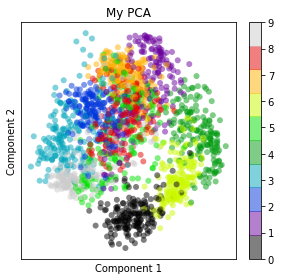

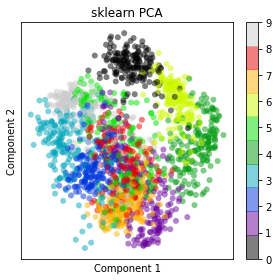

In [10]:
plot_digits_ds(projected_digits, digits.target, sklearn_projected_digits)
